In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Do not print warnings

In [6]:
# Prepare data dirs
train_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/train/'
val_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/val/'
train_cats_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/train/trainCats'
train_dogs_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/train/trainDogs'
validation_cats_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/val/validationCats/'
validation_dogs_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/val/validationDogs/'

In [7]:
# Number of training examples
num_cats = len(os.listdir(train_cats_dir))
num_dogs = len(os.listdir(train_dogs_dir))
# Number of validation examples
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
print(num_cats, num_dogs)
print(num_cats_val, num_dogs_val)

1000 1000
500 500


In [47]:
# Global settings to process the images
BATCH_SIZE = 100  # images will be handled in batches of 50
IMG_SIZE  = 150  # each image will be cropped to 150x150 pixels

# Pull images with keras.preprocessing
train_image_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                                horizontal_flip=True,
                                                                rotation_range=45,
                                                                zoom_range=0.5,
                                                                shear_range=0.2) 
validation_image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

In [48]:
train_data = train_image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True,
                                                           target_size=(IMG_SIZE,IMG_SIZE), class_mode='binary')
val_data = validation_image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=val_dir, shuffle=True,
                                                              target_size=(IMG_SIZE,IMG_SIZE), class_mode='binary')
sample, label= next(train_data) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


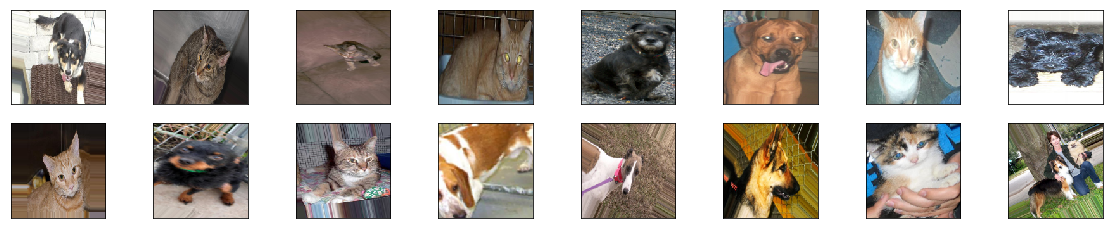

In [49]:
classes = ['cat','dog']
# Print example and its predicted class
plt.figure(figsize=(20,8))
i = 0
for image in sample:
    plt.subplot(4,8,i+1)
    plt.imshow(image)
    plt.xlabel(classes[int(label[i])], color='white')
    plt.xticks([])
    plt.yticks([])
    i += 1
    if 15 < i: break
plt.show()

## Regularised CNN

In [50]:
# CNN model setup with dropout
model_reg = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
model_reg.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
model_reg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 38, 38, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 92416)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [52]:
# Model training
trained_reg = model_reg.fit_generator(train_data, epochs=1, verbose=True, 
                              steps_per_epoch=int(np.ceil((num_cats+num_dogs)/float(BATCH_SIZE))),
                              validation_data=val_data,
                              validation_steps=int(np.ceil((num_cats_val+num_dogs_val) / float(BATCH_SIZE))))

/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1

 4/20 [=====>........................] - ETA: 2:21 - loss: 6.2337 - accuracy: 0.4925

/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1

19/20 [===========================>..] - ETA: 6s - loss: 6.1092 - accuracy: 0.5047 

/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/env1/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/home/erick/anaconda3/envs/en

20/20 [==============================] - 141s 7s/step - loss: 5.8440 - accuracy: 0.5065 - val_loss: 0.7197 - val_accuracy: 0.5000


In [15]:
model_reg.evaluate_generator(val_data, steps=np.ceil((num_cats_val+num_dogs_val)/BATCH_SIZE))

[0.67865851521492, 0.597]

In [ ]:
#predictions=model_reg.predict_generator(val_data)

In [ ]:
#train_predictions=model_reg.predict_generator(train_data, steps=np.ceil((num_cats+num_dogs)/BATCH_SIZE))

In [ ]:
#predictions.shape, train_predictions.shape

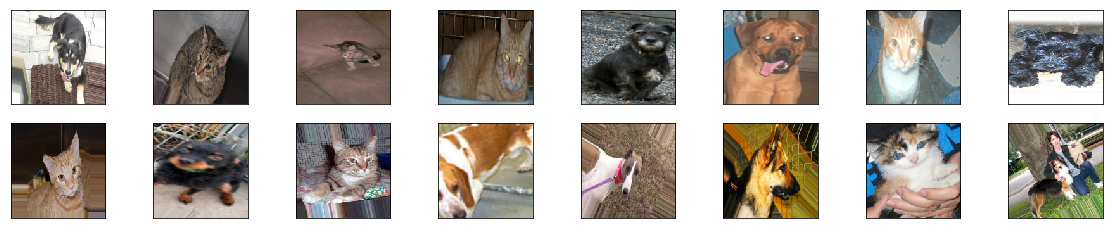

In [53]:
val_sample, _= next(val_data) 
# Print example and its predicted class
plt.figure(figsize=(20,8))
i = 0
for image in sample:
    plt.subplot(4,8,i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[model_reg.predict([[image]]).argmax()], color='white')
    i += 1
    if 15 < i: break
plt.show()

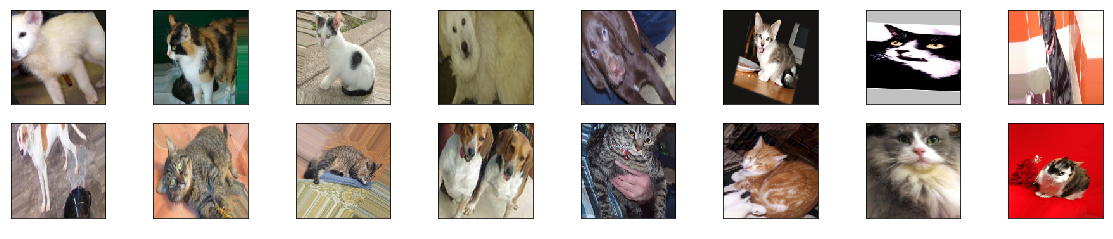

In [54]:
sample, _= next(train_data) 
# Print example and its predicted class
plt.figure(figsize=(20,8))
i = 0
for image in sample:
    plt.subplot(4,8,i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[model_reg.predict([[image]]).argmax()], color='white')
    i += 1
    if 15 < i: break
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

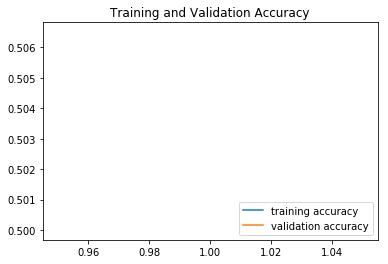

In [56]:
plt.plot(range(1,2), trained_reg.history['accuracy'], label='training accuracy')
plt.plot(range(1,2), trained_reg.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation loss')

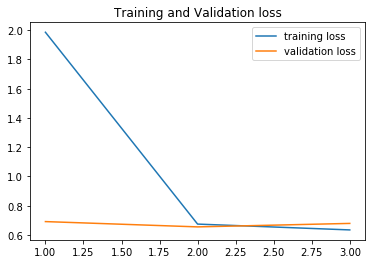

In [39]:
plt.plot(range(1,4), trained_reg.history['loss'], label='training loss')
plt.plot(range(1,4), trained_reg.history['val_loss'], label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')